# Решение задачи "Предсказание стоимость услуг репетитора"

Набор данных содержит 6064 строк о различных преподавателей.
Тренировочный набор - 4548 строк.
Тестовый набор - 1516 строк.

Каждый репетитор обладает 28 параметрами:
1. <span style="background-color:#d6d5d5;">Unnamed: 0</span> - id
2. <span style="background-color:#d6d5d5;">ФИО</span> - предмет+ФИО
3. <span style="background-color:#d6d5d5;">предмет</span> - предмет(математика или информатика)
4. <span style="background-color:#d6d5d5;">tutor_head_tags</span> - какой уровень подготовки способен дать ученику
5. <span style="background-color:#d6d5d5;">categories</span> - категории учеников которых готов учить
6. <span style="background-color:#d6d5d5;">tutor_rating</span> - рейтинг
7. <span style="background-color:#d6d5d5;">tutor_reviews</span> - количество отзывов
8. <span style="background-color:#d6d5d5;">description</span> - self-review
9. <span style="background-color:#d6d5d5;">experience_desc</span> - опыт работы
10. <span style="background-color:#d6d5d5;">status</span> - текущий статус работы(школьный учитель, частный преподаватель)
11. <span style="background-color:#d6d5d5;">experience</span> - опыт в годах
12. <span style="background-color:#d6d5d5;">Education_1</span> - университет 1
13. <span style="background-color:#d6d5d5;">Desc_Education_1</span> - год выпуска, факультет, специальность
14. <span style="background-color:#d6d5d5;">Education_2</span> - аналогично
15. <span style="background-color:#d6d5d5;">Desc_Education_2</span> - аналогично
16. <span style="background-color:#d6d5d5;">Education_3</span> - аналогично
17. <span style="background-color:#d6d5d5;">Desc_Education_3</span> - аналогично
18. <span style="background-color:#d6d5d5;">Education_4</span> - аналогично
19. <span style="background-color:#d6d5d5;">Desc_Education_4</span> - аналогично
20. <span style="background-color:#d6d5d5;">Education_5</span> - аналогично
21. <span style="background-color:#d6d5d5;">Desc_Education_5</span> - аналогично
22. <span style="background-color:#d6d5d5;">Education_6</span> - аналогично
23. <span style="background-color:#d6d5d5;">Desc_Education_6</span> - аналогично
24. <span style="background-color:#d6d5d5;">Ученая степень 1</span> - ученая степень(кандидат технических наук)
25. <span style="background-color:#d6d5d5;">Ученое звание 1</span> - должность в универе
26. <span style="background-color:#d6d5d5;">Ученая степень 2</span> - аналогично
27. <span style="background-color:#d6d5d5;">Ученое звание 2</span> - аналогично
28. <span style="background-color:red;">mean_price</span> - **таргет** средняя стоимость услуг репетитора за минуту в рублях


# Установка и импорт библиотек

In [29]:
!pip install numpy pandas seaborn matplotlib --quiet
!pip install scikit-learn --quiet

In [30]:
# иморитирование всех необходимых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import randint
import matplotlib.pyplot as plt
import math
import os
from sklearn.preprocessing import MultiLabelBinarizer, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR, LinearSVR
import ast
from collections import Counter

# Считывание данных

In [32]:
train = pd.read_excel('data/tutors/tutors_train.xlsx')
test = pd.read_excel('data/tutors/tutors_test.xlsx')
sample_submit = pd.read_csv('data/tutors/sample_submit.csv')

X = train.drop(columns=['mean_price']).copy(deep=True)
y = train['mean_price'].copy(deep=True)

In [33]:
train.head(2)

,Unnamed: 0,предмет,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,...,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories,mean_price
0,0,matematika,Репетитор по математике Емельянова Марина Вла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",...,Университетский преподаватель,31 год,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667
1,1,matematika,Репетитор по математике Назарова Анастасия Ан...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",...,Школьный преподаватель,8 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",11.666667


In [34]:
test.head(2)

,Unnamed: 0,предмет,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,...,Ученое звание 1,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories
0,0,matematika,Репетитор по математике Тихонова Наталья Бори...,"['Школьная программа', 'Подготовка к ЕГЭ', 'Ан...",4,13,Дистанционное убучение по Skype с прим...,NaN,Петрозаводский государственный университет,"Год окончания: 1981, Факультет: физико-матема...",...,NaN,Частный преподаватель,26 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."
1,1,matematika,Репетитор по математике Худайбердина Милана Р...,"['Школьная программа', 'Математический анализ'...",0,0,Буду рада помочь в освоении дисциплин ...,NaN,"Национальный исследовательский университет ""В...","Год окончания: 2022, Факультет: Московский ин...",...,NaN,Студент,4 года,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."


In [35]:
sample_submit.head(2)

,index,mean_price
0,0,19.878115
1,1,0.903784


# Исследование и обработка данных

## Первичный обзор

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4548 non-null   int64  
 1   предмет           4548 non-null   object 
 2   ФИО               4548 non-null   object 
 3   tutor_head_tags   4548 non-null   object 
 4   tutor_rating      3959 non-null   float64
 5   tutor_reviews     4548 non-null   int64  
 6   description       4547 non-null   object 
 7   experience_desc   2171 non-null   object 
 8   Education_1       4548 non-null   object 
 9   Desc_Education_1  4472 non-null   object 
 10  Education_2       781 non-null    object 
 11  Desc_Education_2  777 non-null    object 
 12  Education_3       106 non-null    object 
 13  Desc_Education_3  105 non-null    object 
 14  Education_4       16 non-null     object 
 15  Desc_Education_4  16 non-null     object 
 16  Ученая степень 1  76 non-null     object 


In [39]:
def get_missing_stat(df): 
    missing_count = df.isna().sum()
    missing_percentage = (missing_count / len(train)) * 100
    missing_data = pd.DataFrame({
        'Missing Count': missing_count,
        'Missing Percentage': round(missing_percentage, 2)
    })
    return missing_data[missing_data['Missing Count'] > 0]

get_missing_stat(train)

,Missing Count,Missing Percentage
tutor_rating,589,12.95
description,1,0.02
experience_desc,2377,52.26
Desc_Education_1,76,1.67
Education_2,3767,82.83
Desc_Education_2,3771,82.92
Education_3,4442,97.67
Desc_Education_3,4443,97.69
Education_4,4532,99.65
Desc_Education_4,4532,99.65


## Удаление неинформативных признаков

In [41]:
class GapsPreprocessing(BaseEstimator, TransformerMixin):
    def fit(self, X, y):
        return self

    def transform(self, X):
        columns_to_delete = [
            'Unnamed: 0', # уникальные значения
            'ФИО', # уникальные значения
            'Education_3', # пропусков 97%
            'Desc_Education_3', # пропусков 97%
            'Education_4', # пропусков 99%
            'Desc_Education_4', # пропусков 99%
            'Education_5', # пропусков 99%
            'Desc_Education_5', # пропусков 99%
            'Education_6', # пропусков 99%
            'Desc_Education_6', # пропусков 99%
            'Ученая степень 1', # пропусков 98%
            'Ученое звание 1', # пропусков 99%
            'Ученая степень 2', # пропусков 99%
            'Ученое звание 2', # пропусков 99%
        ]
        X.drop(columns=columns_to_delete, inplace=True)

        return X

    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.transform(X)

In [42]:
X = GapsPreprocessing().fit_transform(X, y)
get_missing_stat(X)

,Missing Count,Missing Percentage
tutor_rating,589,12.95
description,1,0.02
experience_desc,2377,52.26
Desc_Education_1,76,1.67
Education_2,3767,82.83
Desc_Education_2,3771,82.92
status,13,0.29
experience,25,0.55


## Заполнение пропусков

In [44]:
X[['tutor_rating', 'experience_desc', 'status', 'experience']].dropna().head(2).values

array([[0.0,
        '                    Московская Школа (учитель информатики, эксперт ГИА)            2008-2012 коммерческая деятельность_x000D_2010/2011 уч. год ГБОУ Школа №1748 "Вертикаль" (педагог дополнительного образования "шахматы") - в качестве хобби._x000D_2012-2017 ГБОУ Школа №641 им. Сергея Есенина (учитель информатики 5-11 классы)_x000D_2017 по настоящее время ГБОУ Школа №1476 (учитель информатики 5-11 классы, проектная деятельность, подготовка к ЕГЭ, ГИА, эксперт ГИА)    ',
        ' Школьный преподаватель', ' 11 лет '],
       [0.0,
        '                     преподавателем            Мое основное образование "Магистр по электротехнике", но первый опыт работы - преподаватель электротехники._x000D_Учился в аспирантуре и тоже проводил занятия для студентов._x000D_Уже более 15 лет занимаюсь, помогаю студентам готовиться к контрольным и выполнять курсовые. ._x000D_Работа более 5 лет бизнес-тренером, и отсюда - опыт общения с участниками разных возрастов - от школьников д

In [45]:
X[['Education_1', 'Desc_Education_1', 'Education_2', 'Desc_Education_2']].dropna().head(2).values

array([[' Вологодский государственный педагогический университет ',
        ' Год окончания: 2017, Факультет: факультет прикладной математики и информатики, Специальность: прикладная математика и информатика ',
        ' Череповецкий государственный университет ',
        ' Год окончания: 2023, Факультет: институт информационных технологий, Специальность: преподаватель математики и информатики '],
       [' Московский городской педагогический университет ',
        ' Год окончания: 2008, Факультет: Математический, Специальность: Математика и информатика, Квалификация: Учитель математики и информатики ',
        ' Московский городской педагогический университет. С отличием ',
        ' Год окончания: 2014, Факультет: Безопасность Жизнедеятельности, Специальность: Педагогическое образование, Квалификация: Магистр ']],
      dtype=object)

In [46]:
class MissingPreprocessing(BaseEstimator, TransformerMixin):
    def fit(self, X, y):
        return self

    def transform(self, X):
        X['tutor_rating'] = X['tutor_rating'].fillna(0)
        X['experience'] = X['experience'].fillna('0 лет')
        X['description'] = X['description'].fillna('Не указано')
        X['experience_desc'] = X['experience_desc'].fillna('Не указано')
        X['status'] = X['status'].fillna('Не указано')
        X['Education_1'] = X['Education_1'].fillna('Нет высшего образования')
        X['Desc_Education_1'] = X['Desc_Education_1'].fillna('Год окончания: 0000, Факультет: нет, Специальность: нет')
        X['Desc_Education_1'] = X['Desc_Education_1'].apply(lambda x: x if 'Год окончания' in x else 'Год окончания: 0000, Факультет: нет, Специальность: нет')
        X['Education_2'] = X['Education_2'].fillna('Нет высшего образования')
        X['Desc_Education_2'] = X['Desc_Education_2'].fillna('Год окончания: 0000, Факультет: нет, Специальность: нет')
        X['Desc_Education_2'] = X['Desc_Education_2'].apply(lambda x: x if 'Год окончания' in x else 'Год окончания: 0000, Факультет: нет, Специальность: нет')

        return X

    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.transform(X)

In [47]:
X = MissingPreprocessing().fit_transform(X, y)
get_missing_stat(X)

,Missing Count,Missing Percentage


## Преобразование данных

In [49]:
X.head(5)

,предмет,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,Education_2,Desc_Education_2,status,experience,categories
0,matematika,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",5.0,2,Репетитор не предоставил о себе дополн...,Не указано,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",Нет высшего образования,"Год окончания: 0000, Факультет: нет, Специальн...",Университетский преподаватель,31 год,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."
1,matematika,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",4.0,7,Репетитор не предоставил о себе дополн...,Не указано,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",Череповецкий государственный университет,"Год окончания: 2023, Факультет: институт инфо...",Школьный преподаватель,8 лет,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."
2,informatika,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Выезд за город: Балашиха-1, Балашиха-2...",Московская Школа (учитель ...,Московский городской педагогический университет,"Год окончания: 2008, Факультет: Математически...",Московский городской педагогический университ...,"Год окончания: 2014, Факультет: Безопасность ...",Школьный преподаватель,11 лет,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."
3,matematika,"['Школьная программа', 'Математический анализ'...",4.0,19,"Здравствуйте! Меня зовут Елизавета, о...",Не указано,Санкт-Петербургский государственный университет,"Год окончания: 2021, Факультет: физический фа...",Нет высшего образования,"Год окончания: 0000, Факультет: нет, Специальн...",Частный преподаватель,5 лет,"['Школьники с 1 по 4 класс', 'Школьники с 5 по..."
4,matematika,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Целеустремленный, ориентирован на резу...",преподавателем ...,Приазовский государственный технический униве...,"Год окончания: 2005, Факультет: Энергетически...",Нет высшего образования,"Год окончания: 0000, Факультет: нет, Специальн...",Частный преподаватель,19 лет,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."


In [50]:
class FeaturesPreprocessing(BaseEstimator, TransformerMixin):
    def fit(self, X, y):
        return self

    def transform(self, X):
        X['description'] = X['description'].str.strip()
        X['description'] = X['description'].str.lower()
        X['has_description'] = X['description'] \
            .apply(lambda x: False if x == 'не указано' or x == 'репетитор не предоставил о себе дополнительных сведений' else True)
        X.drop(columns=['description'], inplace=True)
        
        X['experience_desc'] = X['experience_desc'].str.strip()
        X['experience_desc'] = X['experience_desc'].str.lower()
        X['has_experience'] = X['experience_desc'] \
            .apply(lambda x: False if x == 'не указано' else True)
        X.drop(columns=['experience_desc'], inplace=True)

        X['Education_1'] = X['Education_1'].str.lower()
        X['Education_2'] = X['Education_2'].str.lower()
        X['brilliantly_graduated'] = X.apply(lambda row: True if 'с отличием' in (row['Education_1'] + row['Education_2']) else False, axis=1)
        X['Education_1'] = X['Education_1'].str.replace('с отличием', '', regex=False)
        X['Education_2'] = X['Education_2'].str.replace('с отличием', '', regex=False)
        X.drop(columns=['Education_1', 'Education_2'], inplace=True)
        
        X['Desc_Education_1'] = X['Desc_Education_1'].str.strip()
        X['Desc_Education_1'] = X['Desc_Education_1'].str.lower()
        X['Desc_Education_2'] = X['Desc_Education_2'].str.strip()
        X['Desc_Education_2'] = X['Desc_Education_2'].str.lower()
        X[['graduated_1', 'graduated_2']] = X.apply(self.merge_desc_education, axis=1)
        X.drop(columns=['Desc_Education_1', 'Desc_Education_2'], inplace=True)

        X['experience'] = X['experience'].str.replace(r"[^\d\.]", "", regex=True)
        X['experience'] = X['experience'].astype('int8')

        X['categories'] = X['categories'].apply(self.transform_categories)
        
        X['tutor_head_tags'] = X['tutor_head_tags'].apply(lambda s: list(ast.literal_eval(s)))
  
        return X

    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.transform(X)

    def merge_desc_education(self, row):
        education_splitted_1 = row['Desc_Education_1'].split(',')
        education_splitted_2 = row['Desc_Education_2'].split(',')

        year_raw_1, *_ = row['Desc_Education_1'].split(',')
        year_raw_2, *_ = row['Desc_Education_2'].split(',')

        year_1 = int(year_raw_1.replace("год окончания: ", ""))
        year_2 = int(year_raw_2.replace("год окончания: ", ""))

        return pd.Series([year_1, year_2])

    def transform_categories(self, s):
        original_list = list(ast.literal_eval(s))
        split_list = []
        for item in original_list:
            split_list.extend(item.split(', '))
        return split_list  

In [51]:
X = FeaturesPreprocessing().fit_transform(X, y)
X.head(3)

,предмет,tutor_head_tags,tutor_rating,tutor_reviews,status,experience,categories,has_description,has_experience,brilliantly_graduated,graduated_1,graduated_2
0,matematika,"[Школьная программа, Подготовка к ЕГЭ, Подгото...",5.0,2,Университетский преподаватель,31,"[Школьники с 5 по 9 класс, Школьники с 10 по 1...",False,False,False,1990,0
1,matematika,"[Школьная программа, Подготовка к ЕГЭ, Подгото...",4.0,7,Школьный преподаватель,8,"[Школьники с 5 по 9 класс, Школьники с 10 по 1...",False,False,False,2017,2023
2,informatika,"[Школьная программа, Подготовка к ЕГЭ, Подгото...",0.0,0,Школьный преподаватель,11,"[Школьники с 5 по 9 класс, Школьники с 10 по 1...",True,True,True,2008,2014


## Обработка категориальных признаков

In [53]:
X['предмет'].value_counts()

предмет
matematika     3685
informatika     863
Name: count, dtype: int64

In [54]:
X['status'].value_counts()

status
 Частный преподаватель                                                         2345
 Студент                                                                       1288
 Школьный преподаватель                                                         558
 Университетский преподаватель                                                  129
 Частный преподаватель, Студент                                                  92
 Университетский преподаватель, Школьный преподаватель                           47
 Аспирант или ординатор очной формы обучения                                     45
 Аспирант или ординатор очной формы обучения, Частный преподаватель              15
Не указано                                                                       13
 Университетский преподаватель, Аспирант или ординатор очной формы обучения      13
 Школьный преподаватель, Аспирант или ординатор очной формы обучения              3
Name: count, dtype: int64

In [55]:
def get_list_categories_value_counts(column):
    all_categories = X[column].sum()
    value_counts = Counter(all_categories)
    value_counts_df = pd.DataFrame(value_counts.items(), columns=['Category', 'Count'])
    return value_counts_df.sort_values(by='Count', ascending=False)
    
get_list_categories_value_counts('tutor_head_tags')

,Category,Count
0,Школьная программа,4233
2,Подготовка к ОГЭ,3813
1,Подготовка к ЕГЭ,2937
8,Подготовка к олимпиадам,674
5,Линейная алгебра,440
3,Математический анализ,379
4,Аналитическая геометрия,290
6,Дифференциальные уравнения,267
7,Теория вероятности и мат. статистика,260
9,Математическая логика,132


In [56]:
get_list_categories_value_counts('categories')

,Category,Count
0,Школьники с 5 по 9 класс,4614
1,Школьники с 10 по 11 класс,3874
2,студенты колледжей и техникумов,3874
3,абитуриенты,3505
4,Школьники с 1 по 4 класс,1468
5,Студенты университетов,818
6,Взрослые кроме абитуриентов и студентов,670
9,Дошкольники,442
7,абитуриенты в паре,258
10,Школьники с 5 по 9 класс в паре,250


In [57]:
class FeaturesEncoderPreprocessing(BaseEstimator, TransformerMixin):
    def fit(self, X, y):
        self.ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
        self.ordinal_categ_columns = ['предмет', 'status']
        self.ordinal_encoder.fit(X[self.ordinal_categ_columns])

        self.mlb_categories = MultiLabelBinarizer()
        self.mlb_categories_column = 'categories'
        self.mlb_categories.fit(X[self.mlb_categories_column])

        self.mlb_tags = MultiLabelBinarizer()
        self.mlb_tags_column = 'tutor_head_tags'
        self.mlb_tags.fit(X[self.mlb_tags_column])
 
        return self

    def transform(self, X):
        encoded = self.mlb_categories.transform(X[self.mlb_categories_column])
        df1 = pd.DataFrame(encoded, columns=self.mlb_categories.classes_)

        encoded = self.mlb_tags.transform(X[self.mlb_tags_column])
        df2 = pd.DataFrame(encoded, columns=self.mlb_tags.classes_)

        X = X.reset_index(drop=True)
        df1 = df1.reset_index(drop=True)
        df2 = df2.reset_index(drop=True)

        X = pd.concat([X, df1, df2], axis=1)
        
        encoded = self.ordinal_encoder.transform(X[self.ordinal_categ_columns])
        X[self.ordinal_categ_columns] = encoded

        X.drop(columns=[self.mlb_categories_column, self.mlb_tags_column], inplace=True)

        return X

    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.transform(X)

In [58]:
X = FeaturesEncoderPreprocessing().fit_transform(X, y)
X.head(3)

,предмет,tutor_rating,tutor_reviews,status,experience,has_description,has_experience,brilliantly_graduated,graduated_1,graduated_2,...,Линейная алгебра,Математическая логика,Математический анализ,Подготовка к ЕГЭ,Подготовка к ОГЭ,Подготовка к олимпиадам,ТФКП,Теория вероятности и мат. статистика,Уравнения мат физики,Школьная программа
0,1.0,5.0,2,3.0,31,False,False,False,1990,0,...,0,0,0,1,1,0,0,0,0,1
1,1.0,4.0,7,8.0,8,False,False,False,2017,2023,...,0,0,0,1,1,0,0,0,0,1
2,0.0,0.0,0,8.0,11,True,True,True,2008,2014,...,0,0,0,1,1,0,0,0,0,1


## Проверка линейных зависимостей в данных

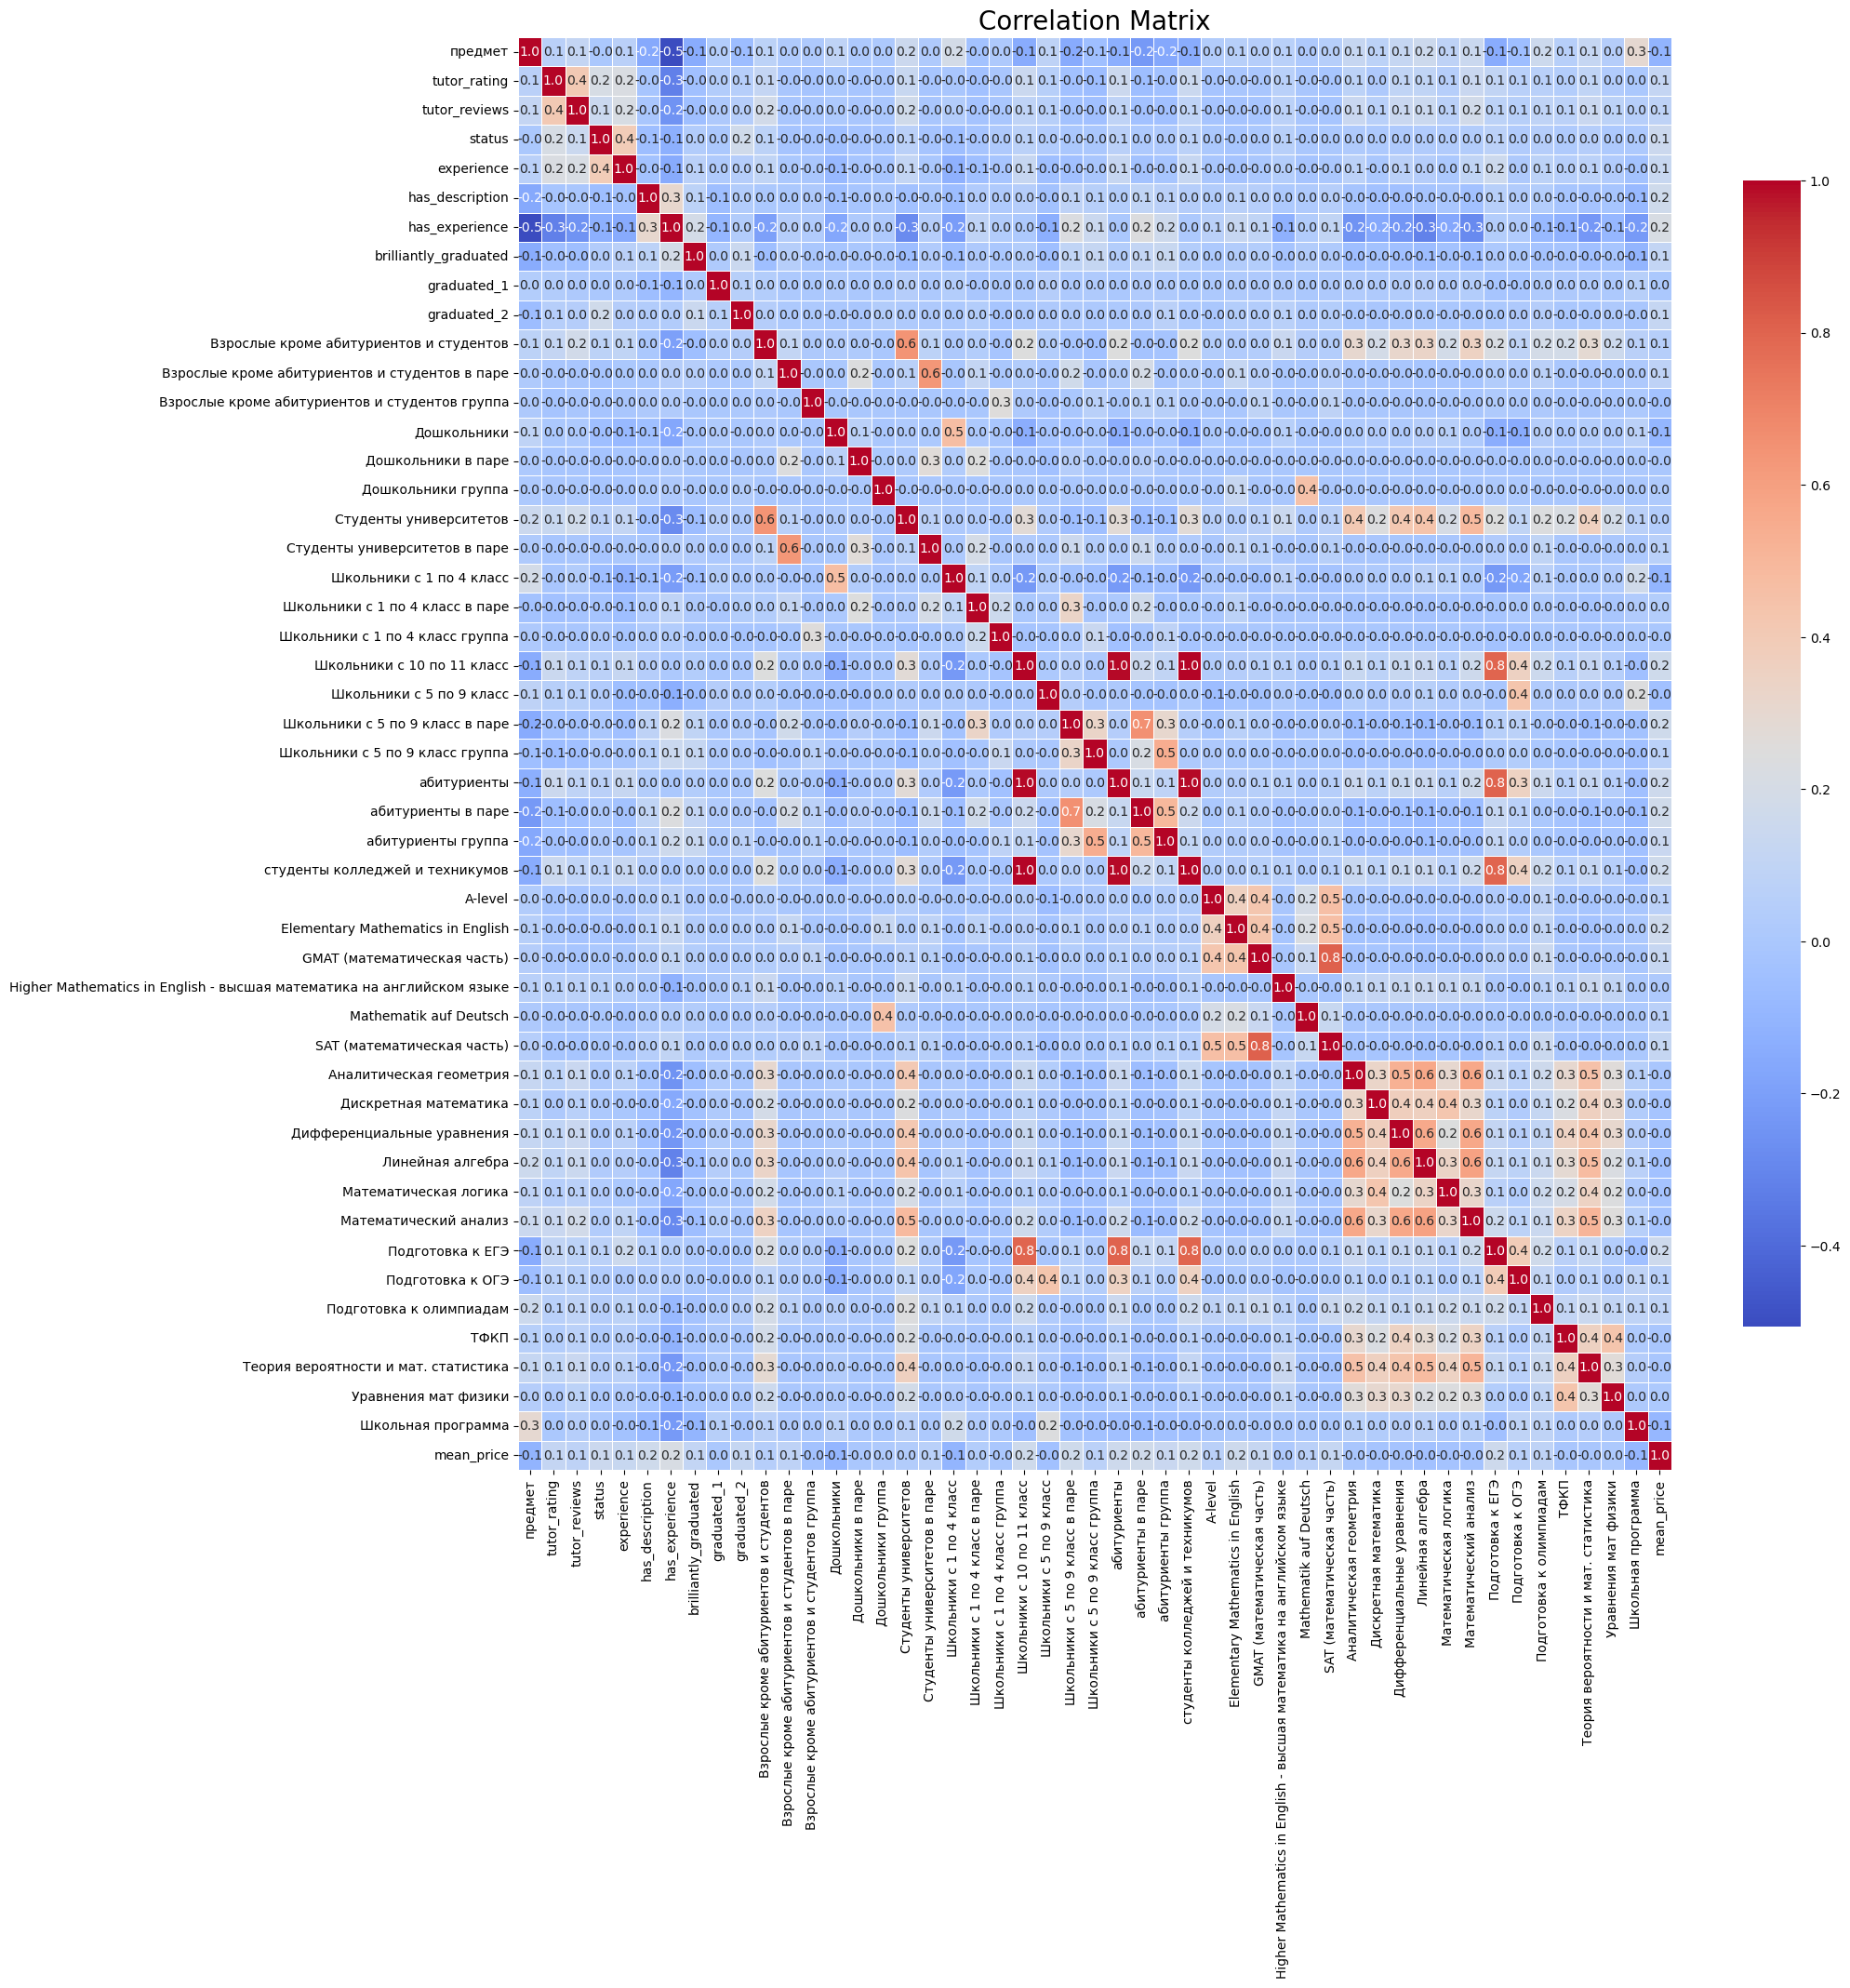

In [60]:
corr_matrix = pd.concat([X, y], axis=1).corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".1f", 
            linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix', size=20)
plt.show()

In [61]:
class LinearPreprocessing(BaseEstimator, TransformerMixin):
    def fit(self, X, y):
        corr_matrix = pd.concat([X, y], axis=1).corr()
        target_corr = corr_matrix['mean_price']
        self.low_corr_features = target_corr[target_corr.abs() < 0.001].index.tolist()
        
        return self

    def transform(self, X):
        X.drop(columns=self.low_corr_features, inplace=True)

        return X

    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.transform(X)

## Обработка таргета

<Axes: ylabel='mean_price'>

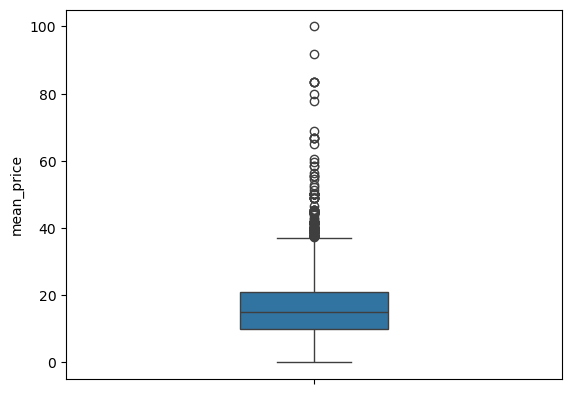

In [63]:
sns.boxplot(train['mean_price'], width=0.3)

Эксперементы с логарифмированием и PowerTransformer выдают худший результат, нежели без. Поэтому никак не обрабатываю.

# Эксперемент с выбором модели

In [66]:
pipeline_preprocessing = Pipeline([
    ('gaps_filter', GapsPreprocessing()),
    ('missing_fill', MissingPreprocessing()),
    ('features_preprocessing', FeaturesPreprocessing()),
    ('features_encoder', FeaturesEncoderPreprocessing()),
    ('linear_filter', LinearPreprocessing()),
])

In [67]:
X = train.drop(columns=['mean_price'])
y = train['mean_price']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Test dataset size: {X_test.shape}, {y_test.shape}')
      
X_train_transformed = pipeline_preprocessing.fit_transform(X_train.copy(deep=True), y_train)
X_test_transformed = pipeline_preprocessing.transform(X_test.copy(deep=True))

print(f'Train transformed dataset size: {X_train_transformed.shape}, {y_train.shape}')
print(f'Test transformed dataset size: {X_test_transformed.shape}, {y_test.shape}')

Train dataset size: (3183, 27), (3183,)
Test dataset size: (1365, 27), (1365,)
Train transformed dataset size: (3183, 47), (3183,)
Test transformed dataset size: (1365, 47), (1365,)


In [69]:
lig_reg = LinearRegression()
tree = DecisionTreeRegressor()
knn = KNeighborsRegressor(2)
randomForest = RandomForestRegressor(n_estimators=100, random_state=42)
svm_poly = SVR(kernel='poly')
svm_rbf = SVR(kernel='rbf')
svm_linear = LinearSVR()

lig_reg.fit(X_train_transformed, y_train)
tree.fit(X_train_transformed, y_train)
knn.fit(X_train_transformed, y_train)
randomForest.fit(X_train_transformed, y_train)
svm_poly.fit(X_train_transformed, y_train)
svm_rbf.fit(X_train_transformed, y_train)
svm_linear.fit(X_train_transformed, y_train)

y_pred_lig = lig_reg.predict(X_test_transformed)
y_pred_tree = tree.predict(X_test_transformed)
y_pred_knn = knn.predict(X_test_transformed)
y_pred_randomForest = randomForest.predict(X_test_transformed)
y_pred_svm_poly = svm_poly.predict(X_test_transformed)
y_pred_svm_rbf = svm_rbf.predict(X_test_transformed)
y_pred_svm_linear = svm_linear.predict(X_test_transformed)

print('LinearRegression')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_lig))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_lig))
print('R2 score:', r2_score(y_test, y_pred_lig))

print('\nDecisionTreeRegressor')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_tree))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_tree))
print('R2 score:', r2_score(y_test, y_pred_tree))

print('\nKNeighborsRegressor')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_knn))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_knn))
print('R2 score:', r2_score(y_test, y_pred_knn))

print('\nRandomForestRegressor')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_randomForest))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_randomForest))
print('R2 score:', r2_score(y_test, y_pred_randomForest))

print('\nSVR poly')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_svm_poly))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_svm_poly))
print('R2 score:', r2_score(y_test, y_pred_svm_poly))

print('\nSVR rbf')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_svm_rbf))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_svm_rbf))
print('R2 score:', r2_score(y_test, y_pred_svm_rbf))

print('\nLinearSVR')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_svm_linear))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_svm_linear))
print('R2 score:', r2_score(y_test, y_pred_svm_linear))

/Users/v.papadyk/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/v.papadyk/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearRegression
Mean Absolute Error: 6.709714298674955
Mean Squared Error: 98.9064394698519
R2 score: 0.1334433906421213

DecisionTreeRegressor
Mean Absolute Error: 8.522146721894982
Mean Squared Error: 162.88908691867664
R2 score: -0.42713270863091335

KNeighborsRegressor
Mean Absolute Error: 7.701401632995957
Mean Squared Error: 130.85070012152545
R2 score: -0.14643232166876685

RandomForestRegressor
Mean Absolute Error: 6.249970254643854
Mean Squared Error: 93.4117755409698
R2 score: 0.18158421311328576

SVR poly
Mean Absolute Error: 7.403432565680376
Mean Squared Error: 113.080969736042
R2 score: 0.009254986403240961

SVR rbf
Mean Absolute Error: 7.402757407624231
Mean Squared Error: 113.05372368258536
R2 score: 0.009493699350833773

LinearSVR
Mean Absolute Error: 11.409058131008756
Mean Squared Error: 235.81545880783554
R2 score: -1.0660681500012799


Лидеры - LinearRegression и RandomForestRegressor, проверим их на кросс-валидации.

In [71]:
scores = cross_val_score(LinearRegression(), X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')
scores

array([ -82.4205939 ,  -82.82159447,  -82.73865996, -107.76134127,
       -101.38534538])

In [72]:
scores = cross_val_score(RandomForestRegressor(), X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')
scores

array([-85.89896555, -71.58379801, -79.04006382, -95.15759543,
       -99.02913794])

Лучшие результаты показывает RandomForestRegressor, подберем для неё оптимальные гиперпараметры.

# Подбор гиперпараметров модели

In [75]:
param_dist = {
    'n_estimators': randint(50, 900),
    'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}
random_search = RandomizedSearchCV(RandomForestRegressor(), param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
random_search.fit(X_train_transformed, y_train)

print("Лучшие параметры:", random_search.best_params_)

y_pred = random_search.predict(X_test_transformed)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Лучшие параметры: {'bootstrap': True, 'max_depth': 25, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 395}
Mean Absolute Error: 6.134293585738963
Mean Squared Error: 90.38107377749583
R2 score: 0.20813733400418055


Лучшие параметры: {'bootstrap': True, 'max_depth': 25, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 395}

Mean Absolute Error: 6.110481275479308  
Mean Squared Error: 89.90019839732298  
R2 score: 0.2123504645263169

# Предсказание для `test`

In [78]:
X_train = pipeline_preprocessing.fit_transform(X.copy(deep=True), y)
X_test = pipeline_preprocessing.transform(test.copy(deep=True))

/Users/v.papadyk/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:900: UserWarning: unknown class(es) ['Студенты университетов группа'] will be ignored
  warnings.warn(


In [79]:
lig_reg = LinearRegression()
lig_reg.fit(X_train, y)

y_test = lig_reg.predict(X_test)

submition = pd.DataFrame(y_test, columns=['mean_price'])
submition = submition.reset_index()
submition.to_csv('LinearRegression_submit.csv', index=False);

score: 65.70380

In [81]:
random_forest = RandomForestRegressor(bootstrap=True, max_depth=25, min_samples_leaf=2, min_samples_split=10, n_estimators=395)
random_forest.fit(X_train, y)

y_test = random_forest.predict(X_test)

submition = pd.DataFrame(y_test, columns=['mean_price'])
submition = submition.reset_index()
submition.to_csv('RandomForestRegressor_submit.csv', index=False);

score: 55.06913

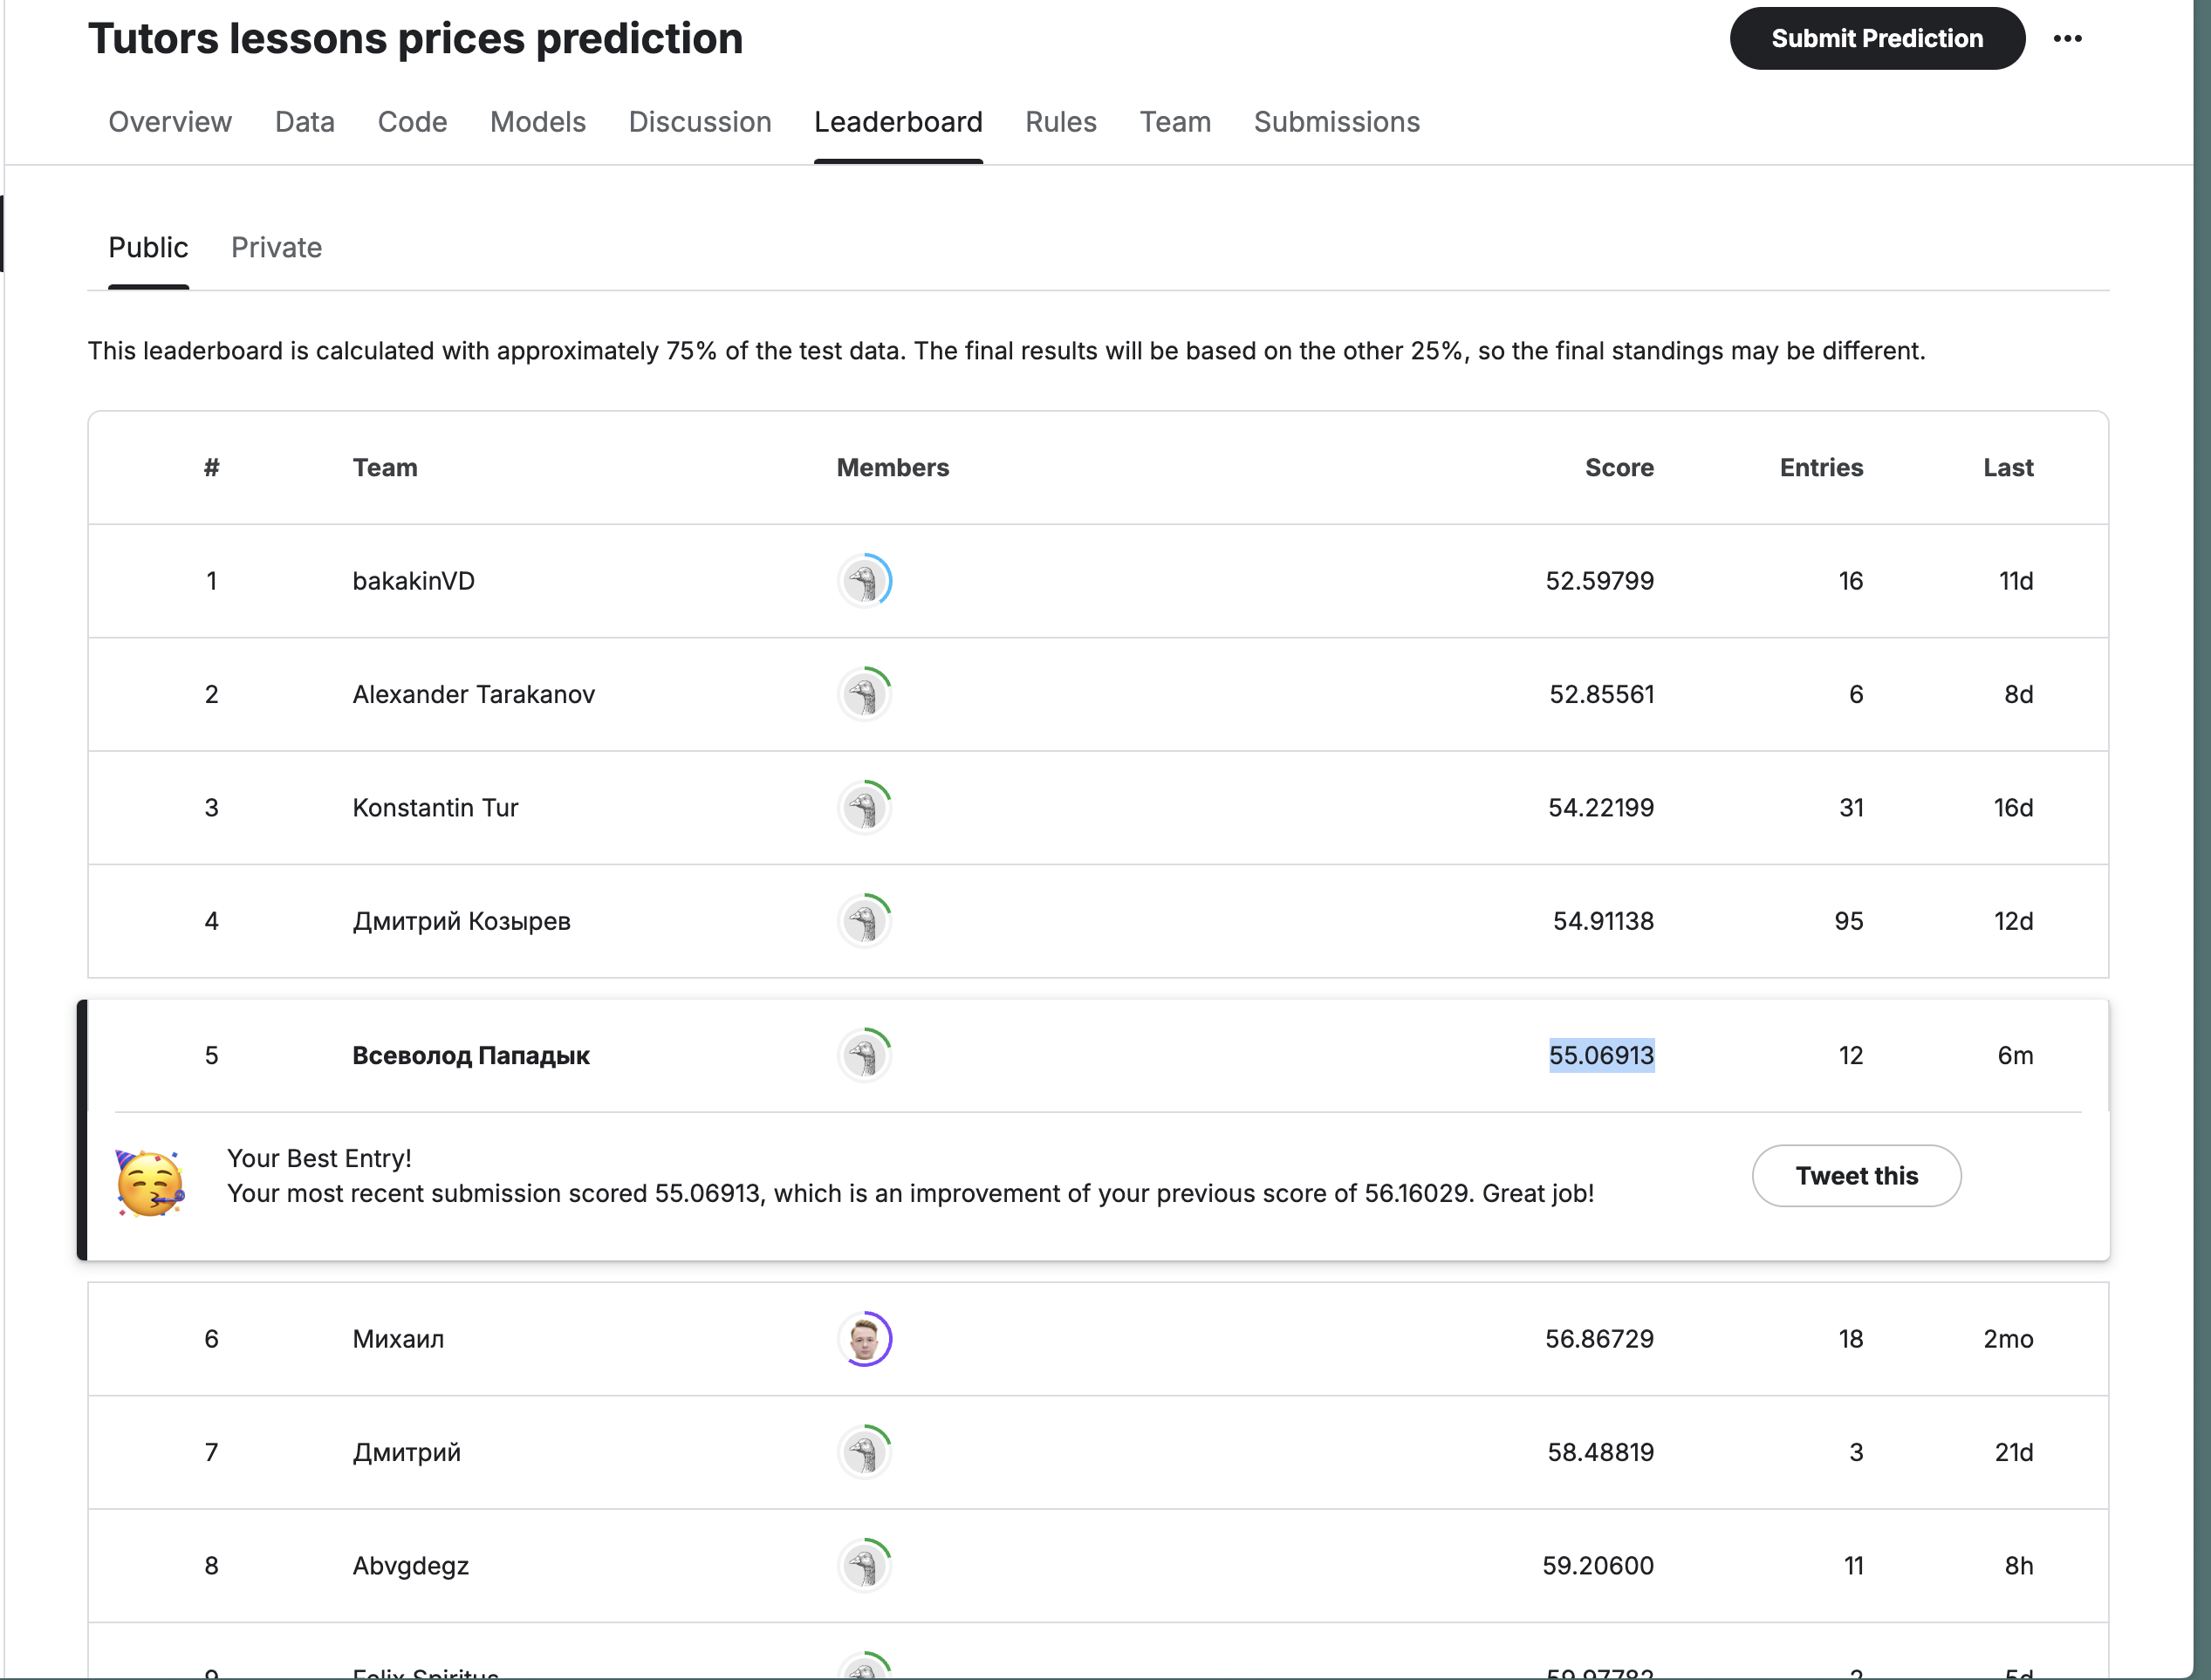